Final exercise - 
Seasonal weather anomalies

In [152]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [153]:
# Defining file path
fp = r"/home/jovyan/my-work/notebooks/L7/2315676.txt"

# Reading the file with pandas and converting NA values
data = pd.read_csv(
    fp,
    usecols=["DATE", "STATION", "STATION_NAME", "TAVG", "TMAX", "TMIN"],
    skiprows= [1],
    delim_whitespace=True,
    na_values=["-9999"],
)

# Check data
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0


In [154]:
# Creating and calculating the average temperature 
data["TEMP_F"] = (data["TMAX"] + data["TMIN"]) / 2

# Checking data
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0,-17.5
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0,-10.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0,-10.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0,-15.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0,-16.0


In [155]:
#Checking how many no data values
print(f"Number of no data values per column:\n{data.isna().sum()}")

Number of no data values per column:
STATION             0
STATION_NAME        0
DATE                0
TAVG            19843
TMAX              769
TMIN             1946
TEMP_F           2623
dtype: int64


In [156]:
# Filling the missing values from TAVG column with values from TEMP_F
data["TAVG"] = data["TAVG"].fillna(data["TEMP_F"])

# Checking data
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0


In [157]:
# Removing the rows that still miss data
data.dropna(subset=["TAVG"], inplace=True)

In [158]:
#Checking how many no data values
print(f"Number of no data values per column:\n{data.isna().sum()}")

Number of no data values per column:
STATION            0
STATION_NAME       0
DATE               0
TAVG               0
TMAX             676
TMIN            1856
TEMP_F          2440
dtype: int64


In [159]:
# Defining function to convert temperatures from Fahrenheit to Celsius
def fahr_to_celsius(temp_fahrenheit):
    """Function to convert Fahrenheit temperature into Celsius
    
    Parameters
    ----------
    temp_fahrenheit: int (input temperature in Fahrenheit)
    
    Returns
    -------
    Temperature in Celsius
    """
    # Convert Fahrenheit into Celsius
    converted_temp = (temp_fahrenheit - 32) / 1.8
    return converted_temp

In [160]:
# Testing the function
fahr_to_celsius(32)

0.0

In [161]:
# New column for the converted temperatures and apllying the function to convert temperatures to Celsius
data["TAVG_C"] = data["TAVG"].apply(fahr_to_celsius)

# Checking data
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F,TAVG_C
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5,-27.500000
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0,-23.333333
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0,-23.333333
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0,-26.111111
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0,-26.666667


In [162]:
# Converting DATE to string in a new column
data["DATE_STR"] = data["DATE"].astype(str)

# Converting DATE to datetime
data["TIME"] = pd.to_datetime(data["DATE_STR"])

# Creating a new column for each year and month
data["YEAR"] = data["TIME"].dt.year
data["MONTH"] = data["TIME"].dt.month

# Checking data
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F,TAVG_C,DATE_STR,TIME,YEAR,MONTH
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0,-17.5,-27.500000,19080101,1908-01-01,1908,1
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0,-10.0,-23.333333,19080102,1908-01-02,1908,1
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0,-10.0,-23.333333,19080103,1908-01-03,1908,1
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0,-15.0,-26.111111,19080104,1908-01-04,1908,1
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0,-16.0,-26.666667,19080105,1908-01-05,1908,1


In [163]:
# Function to assign the seasons
def season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"

# Applying function
data["SEASON"] = data["MONTH"].apply(season)

data.tail()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TEMP_F,TAVG_C,DATE_STR,TIME,YEAR,MONTH,SEASON
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN,NaN,8.333333,20201003,2020-10-03,2020,10,Autumn
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0,42.0,6.111111,20201004,2020-10-04,2020,10,Autumn
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0,NaN,5.555556,20201005,2020-10-05,2020,10,Autumn
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0,44.5,7.222222,20201006,2020-10-06,2020,10,Autumn
41064,GHCND:FI000007501,SODANKYLA-AWS-FI,20201007,47.0,50.0,44.0,47.0,8.333333,20201007,2020-10-07,2020,10,Autumn


In [164]:
# Grouping data based on year and season, calculating the mean and converting grouped back to DataFrame
season_avg_temp = data.groupby(by=["YEAR", "SEASON"])["TAVG_C"].mean().reset_index()

# Renaming TAVG_C
new_names = {"TAVG_C":"SEASON_TAVG_C"}
season_avg_temp = season_avg_temp.rename(columns=new_names)

# Checking data
season_avg_temp.head()

,YEAR,SEASON,SEASON_TAVG_C
0,1908,Autumn,-1.859217
1,1908,Spring,-2.346743
2,1908,Summer,11.425926
3,1908,Winter,-12.330779
4,1909,Autumn,-0.155827


In [165]:
# Filtering the data for the period 1951 to 1980
Period_51_80 = season_avg_temp[(season_avg_temp["YEAR"] >= 1951) & (season_avg_temp["YEAR"] <= 1980)]

In [168]:
# Grouping data based on season, calculating the mean and converting grouped back to DataFrame
season_avg_51_80 = Period_51_80.groupby(by=["SEASON"])["SEASON_TAVG_C"].mean().reset_index()

# Renaming TAVG_C
new_names2 = {"SEASON_TAVG_C":"PERIOD_TAVG_C"}
season_avg_51_80 = season_avg_51_80.rename(columns=new_names2)

# Checking data
season_avg_51_80.head()

,SEASON,PERIOD_TAVG_C
0,Autumn,-0.816010
1,Spring,-2.338516
2,Summer,12.400262
3,Winter,-13.553475


In [169]:
# Merging data period (1951-1980) with the original data
avg_temp = pd.merge(season_avg_temp,season_avg_51_80, on="SEASON")

# Calculate anomaly to a new column
avg_temp["ANOMALY"] = avg_temp["SEASON_TAVG_C"] - avg_temp["PERIOD_TAVG_C"]

# Setting year as index
avg_temp.set_index('YEAR', inplace=True)

# Checking data
avg_temp.head()

,SEASON,SEASON_TAVG_C,PERIOD_TAVG_C,ANOMALY
YEAR,,,,
1908,Autumn,-1.859217,-0.81601,-1.043207
1909,Autumn,-0.155827,-0.81601,0.660183
1910,Autumn,-1.742063,-0.81601,-0.926054
1911,Autumn,-1.279150,-0.81601,-0.463140
1912,Autumn,-2.073413,-0.81601,-1.257403


In [170]:
# Selecting records for seasons and extracting seasonal anomalies
winter = avg_temp[avg_temp["SEASON"] == "Winter"]
winter_anomaly = winter["ANOMALY"]

spring = avg_temp[avg_temp["SEASON"] == "Spring"]
spring_anomaly = spring["ANOMALY"]

summer = avg_temp[avg_temp["SEASON"] == "Summer"]
summer_anomaly = summer["ANOMALY"]

autumn = avg_temp[avg_temp["SEASON"] == "Autumn"]
autumn_anomaly = autumn["ANOMALY"]


array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

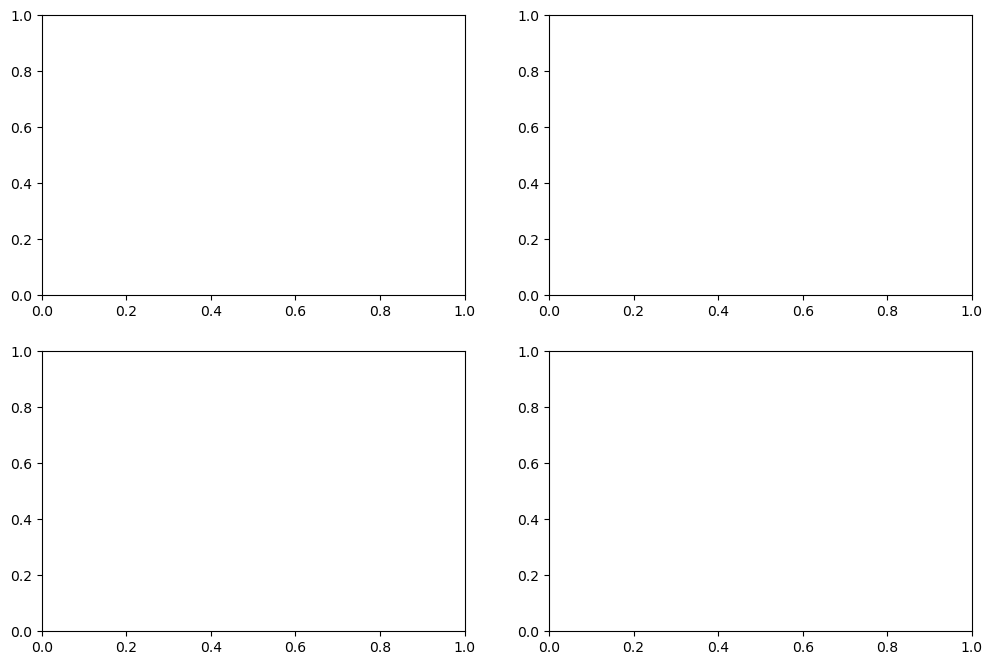

In [171]:
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axes

In [172]:
# Splitting axes into own variables
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

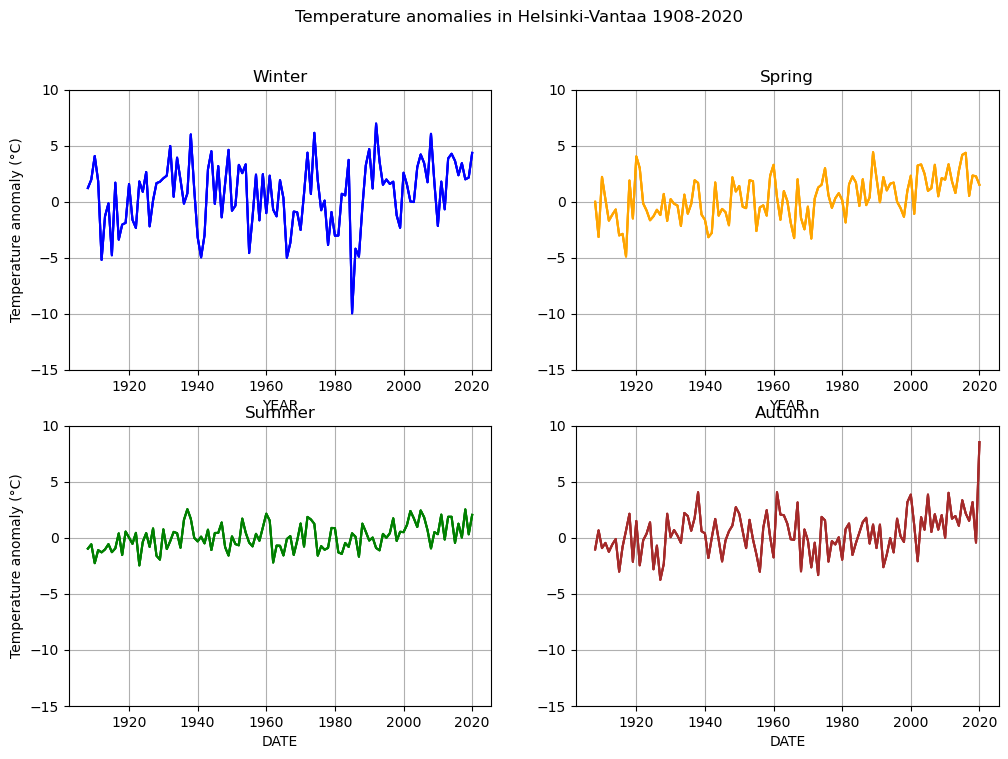

In [175]:
# Plotting data
winter_anomaly.plot(ax=ax11, c="blue", lw= 1.5, ylim=[-15,10], grid=True)
spring_anomaly.plot(ax=ax12, c="orange", lw= 1.5, ylim=[-15,10], grid=True)
summer_anomaly.plot(ax=ax21, c="green", lw= 1.5, ylim=[-15,10], grid=True)
autumn_anomaly.plot(ax=ax22, c="brown", lw= 1.5, ylim=[-15,10], grid=True)

# Setting figure title
fig.suptitle("Temperature anomalies in Helsinki-Vantaa 1908-2020")

# Setting axis labels
ax21.set_xlabel ("DATE")
ax22.set_xlabel ("DATE")
ax11.set_ylabel ("Temperature anomaly (°C)")
ax21.set_ylabel ("Temperature anomaly (°C)")

# Setting season label text
ax11.set_title("Winter")
ax12.set_title("Spring")
ax21.set_title("Summer")
ax22.set_title("Autumn")

# Display figure
fig

Use of AI-LLM tools in the exercise

In the beggining the exercise went well with only the course material. During the exercise I had to still use ChatGPT the free version a couple of times.

First time I used it while trying to define a function that assigns the correct seasons for the data. I basically asked how to do it if I know the months. I used part of this code and then I modified it. From the AI generated code I checked how it wrote the conditional statement (if-elif)

Second time I used AI to ask how I can group and calculate the mean based on year and season. It gave me an example that I modified. I used the part from AI that tells how to specify the column TAVG where the mean is calculated from.

Last time I used AI was when I asked how to calculate seasonal temperature anomalies for each year. From that I got the merge function and how to use it.

Other parts of the code was made with cour